## 3.5 Advanced Feature Extraction (cont'd)

In [1]:
# Library Imports:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from subprocess import check_output
import os
import gc
from bs4 import BeautifulSoup
from os import path
from PIL import Image

# Importing the foll. library show a word-cloud plot:
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS

import time

### 3.5.1 Analysis of Extracted Features
#### 3.5.1.1 Plotting Word Clouds

- Creating word clouds of Duplicate Questions and Non-duplicate Questions.
- We can observe which of the words occur most frequently.

In [3]:
# Loading the preprocessed & advanced featurized data:
df = pd.read_csv('nlp_features_train.csv', encoding='latin-1')
print(df.shape)
df.head()

(404290, 21)


id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve...   
4   4     9    10  which one dissolve in water quikly sugar  salt...   

                                           question2  is_duplicate   cwc_min  \
0  what is the step by step guide to invest in sh...             0  0.999980   
1  what would happen if the indian government sto...             0  0.799984   
2  how can internet speed be increased by hacking...             0  0.399992   
3  find the remainder when  math 23  24   math  i...             0  0.000000   
4            which fish would survive in salt water              0  0.399992   

    cwc_max   csc_min   csc_max          ...            ctc_max  last_word_eq  \
0  0.833319  0.999983  0.999983          ...           0.785709           0.0   
1  0.399996  0.749981  0.599988          ...           0.466664           0.0   
2  0.333328  0.399992  0.249997          ...           0.285712           0.0   
3  0.000000  0.000000  0.000000          ...           0.000000           0.0   
4  0.199998  0.999950  0.666644          ...           0.307690           0.0   

   first_word_eq  abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  \
0            1.0           0.0      13.0              100                93   
1            1.0           0.0      12.5               86                63   
2            1.0           0.0      12.0               63                63   
3            0.0           0.0      12.0               28                24   
4            1.0           0.0      10.0               67                47   

   fuzz_ratio  fuzz_parital_ratio  longest_substr_ratio  
0          93                 100              0.982759  
1          66                  75              0.596154  
2          43                  47              0.166667  
3           9                  14              0.039216  
4          35                  56              0.175000  

[5 rows x 21 columns]

In [6]:
df_dup = df[df.is_duplicate == 1]
df_non_dup = df[df.is_duplicate == 0]

# Converting 2D array of q1 & q2 into 1D array by flattening the array:
# Flattening Example: [[1,2], [3,4]] ---flatten()---> [1,2,3,4]
dup = np.dstack([df_dup.question1, df_dup.question2]).flatten()
non_dup = np.dstack([df_non_dup.question1, df_non_dup.question2]).flatten()

print("Number of data points in class 1 [duplicate question pairs]:", len(dup))
print("Number of data points in class 0 [non-duplicate question pairs]:", len(non_dup))

# Saving the numpy arrays dup and non_dup into a text file:
np.savetxt('train_dup_question_pairs.txt', dup, delimiter=' ', fmt='%s')
np.savetxt('train_non_dup_question_pairs.txt', non_dup, delimiter=' ', fmt='%s')

Number of data points in class 1 [duplicate question pairs]: 298526
Number of data points in class 0 [non-duplicate question pairs]: 510054


In [10]:
# Reading the text files and removing the Stop Words:
d = path.dirname('.')

text_dup_w = open(path.join(d, 'train_dup_question_pairs.txt')).read()
text_non_dup_w = open(path.join(d, 'train_non_dup_question_pairs.txt')).read()

stopwords = set(STOPWORDS)
stopwords.add('said')
stopwords.add('br')
stopwords.add(' ')
stopwords.remove('not')
stopwords.remove('no')
stopwords.remove('like')

print("Total number of words in duplicate pair questions:", len(text_dup_w))
print("Total number of words in non duplicate pair questions:", len(text_non_dup_w))

Total number of words in duplicate pair questions: 16100349
Total number of words in non duplicate pair questions: 33168037


__Word Clouds generated from Duplicate Pair Question's text__: 

Word Cloud for Duplicate Question Pairs:


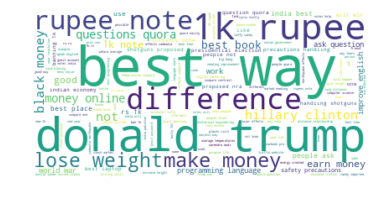

In [12]:
wc = WordCloud(background_color="white", max_words=len(text_dup_w), stopwords=stopwords)
wc.generate(text_dup_w)
print('Word Cloud for Duplicate Question Pairs:')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud above shows that the most frequently occurring words in all the duplicate questions are 'best way', 'donald trump', '1k rupee', etc.
The bigger the word in the word cloud, the more frequently occurring the word is.

__Word Cloud generated from Non-duplicate Pair Question's text__:

Word Cloud for Non-Duplicate Question Pairs:


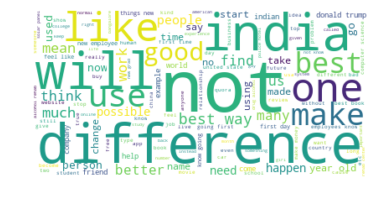

In [13]:
wc1 = WordCloud(background_color="white", max_words=len(text_non_dup_w), stopwords=stopwords)
wc1.generate(text_non_dup_w)
print('Word Cloud for Non-Duplicate Question Pairs:')
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud above shows that the most frequently occurring words in Non-Duplicate Question Pairs are 'not', 'difference', 'india', etc.

#### 3.5.1.2 Pair Plots of Features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio']

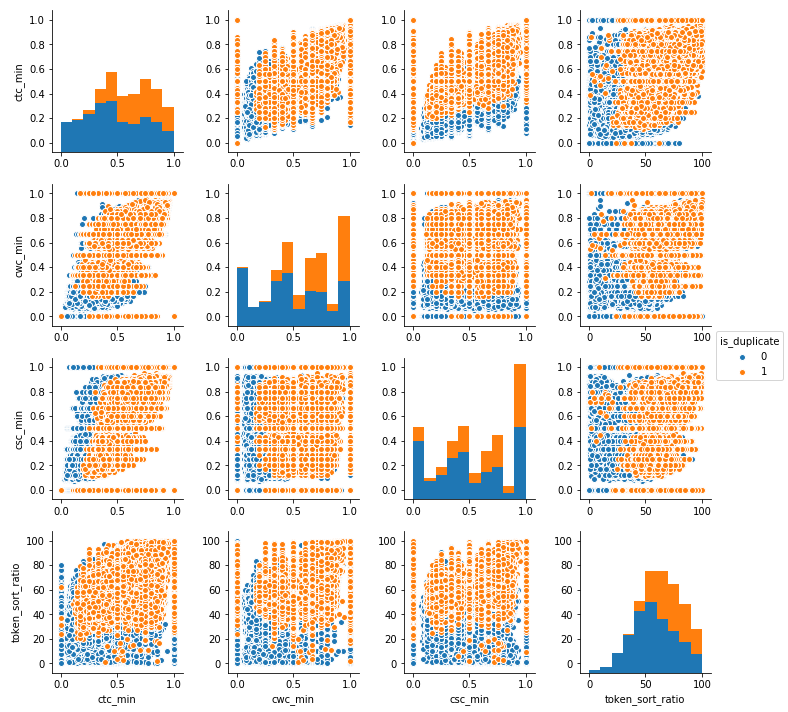

In [14]:
sns.pairplot(
    df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']]\
    [0:df.shape[0]], hue = 'is_duplicate',
    vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio']
)
plt.show()

_Analysis_:
There is signficant overlap in all the pairplots, but we can still see that there are blue and orange points visible separately.

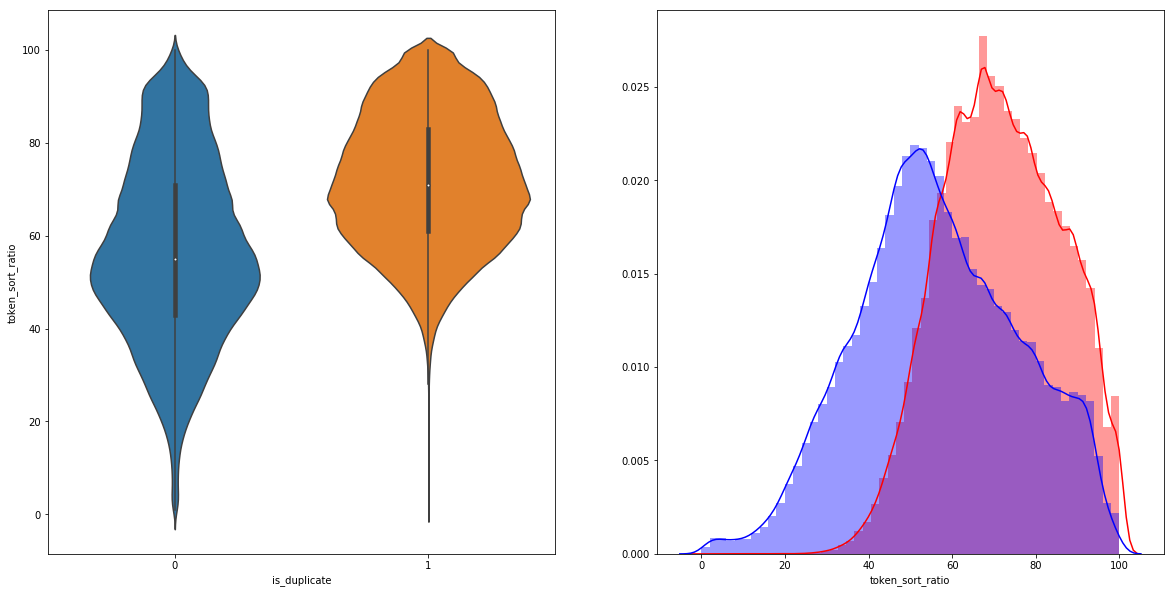

In [20]:
# Distribution of the token_sort_ratio:
plt.figure(figsize=(20,10))

# Violin Plot for token_sort_ratio feature:
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:])

# Histogram / PDF of token_sort_ratio feature:
plt.subplot(1,2,2)
sns.distplot(
    df[df.is_duplicate == 1.0]['token_sort_ratio'][0:],
    label='1', color='red'
)

sns.distplot(
    df[df.is_duplicate == 0.0]['token_sort_ratio'][0:],
    label='0', color='blue'
)

plt.show()

If we see both the plots above, with the PDF distribution, we can see that there's an overlap to near right of the blue PDF with the red PDF.

With the Violin plots, we can see that the 50th percentiles (medians) of both duplicate & non-duplicate quesion pairs are not overlapping.

Therefore, this feature 'token_sort_ratio', plays an important role for our duplicacy check.

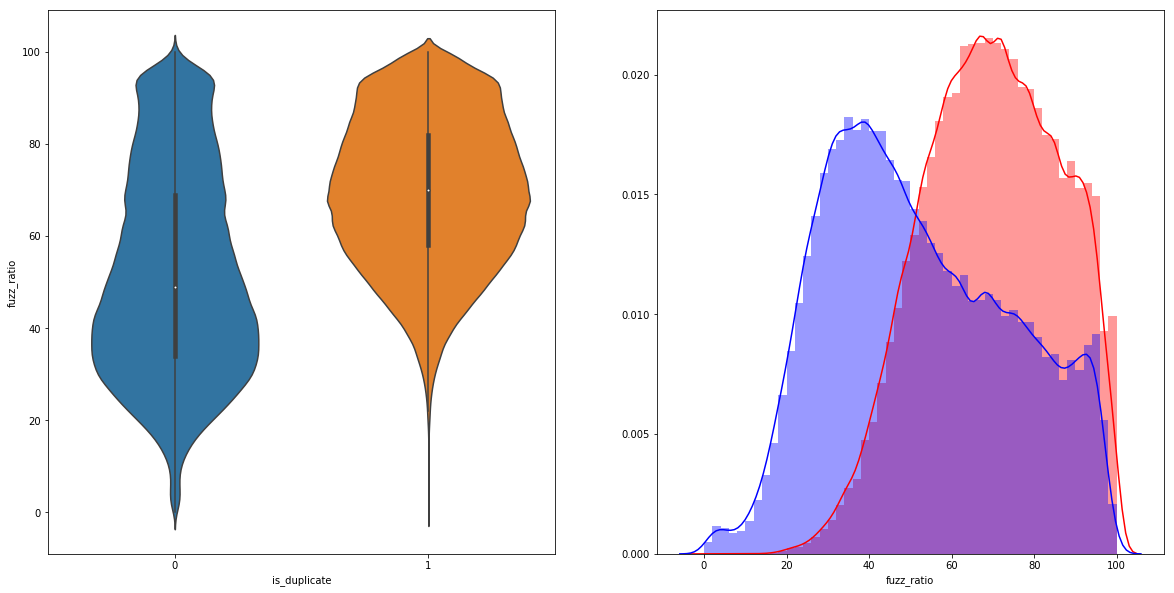

In [17]:
# Distribution of the fuzz_ratio:
plt.figure(figsize=(20,10))

# Violin Plot for fuzz_ratio feature:
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:])

# Histogram / PDF of fuzz_ratio feature:
plt.subplot(1,2,2)
sns.distplot(
    df[df.is_duplicate == 1.0]['fuzz_ratio'][0:],
    label='1', color='red'
)

sns.distplot(
    df[df.is_duplicate == 0.0]['fuzz_ratio'][0:],
    label='0', color='blue'
)

plt.show()

Even the fuzz_ratio PDF plot has significant overlap in the middle. But we can clearly see some red points on the top right, and blue points on the left side of the PDF plot.

With the Violin Plots, we can see that the 50th percentiles (medians) of both duplicate & non-duplicate question pairs are not overlapping. That is a good sign, that this feature is highly useful, when we apply an ML model to classify whether the questions are duplicate or not.

### 3.5.2 Visualization using PCA & t-SNE

We are now visualizing only advanced features.
Later we will visualize 2D plot of all the features along with word2vec vector representations of q1 & q2.

#### 3.5.2.1 Visualization using Principal Component Analysis [PCA]
We will first see a 2D plot, and then see a 3D plot.

#### 2D PCA Plot

In [30]:
# We will apply PCA on sample data (10k data points):
df_s = df[0:10000]

# Sample the class label (is_duplicate) from sampled data into a new variable:
sample_labels = df_s['is_duplicate']

# Drop the class label (is_duplicate) from the sampled data:
df_sample = df_s.drop('is_duplicate', axis=1)

print("~> The shape of the sampled data is: {}".format(df_sample.shape))
print("~> The shape of the class label is: {}".format(sample_labels.shape))

~> The shape of the sampled data is: (10000, 20)
~> The shape of the class label is: (10000,)


In [31]:
df_sample.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2   cwc_min   cwc_max  \
0  what is the step by step guide to invest in sh...  0.999980  0.833319   
1  what would happen if the indian government sto...  0.799984  0.399996   

    csc_min   csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
0  0.999983  0.999983  0.916659  0.785709           0.0            1.0   
1  0.749981  0.599988  0.699993  0.466664           0.0            1.0   

   abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  fuzz_ratio  \
0           0.0      13.0              100                93          93   
1           0.0      12.5               86                63          66   

   fuzz_parital_ratio  longest_substr_ratio  
0                 100              0.982759  
1                  75              0.596154

In [32]:
sample_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: is_duplicate, dtype: int64

In [37]:
# Data-preprocessing: Standardize the data, i.e., Mean Centering:
from sklearn.preprocessing import StandardScaler

# We will not consider q1 & q2, because they're not converted into numeric vector till now
std_data = StandardScaler().fit_transform(
    df_sample[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 
               'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',
               'abs_len_diff', 'mean_len', 'token_set_ratio','token_sort_ratio',
               'fuzz_ratio', 'fuzz_parital_ratio', 'longest_substr_ratio']]
)

print(std_data.shape)

(10000, 15)


In [39]:
# Check the stdized data:
print(std_data[:2,:])

[[ 1.33290052  1.37680971  1.26608035  1.88208788  1.35443013  1.43894154
  -0.6762404   0.97140856  0.          0.33699245  1.37512904  1.61509069
   1.57318235  1.87063632  2.58200464]
 [ 0.68724986 -0.21080919  0.52623379  0.54947793  0.5409805   0.13997723
  -0.6762404   0.97140856  0.          0.24248297  0.69698109  0.03769451
   0.34693315  0.54733006  0.89940355]]


In [40]:
# Library to use PCA:
from sklearn import decomposition

# Initiate the PCA instance:
pca = decomposition.PCA()

st = time.time()
# Configuring the parameters:
# The number of components = 2, since we are projecting 15D points on a 2D plane.
# We will get the top 2 eigen vectors as the principal components:
pca.n_components = 2

pca_sample_data = pca.fit_transform(std_data)

print("~> Shape of pca_sample_data is:", pca_sample_data.shape)
print('Total time taken to convert 15D data projection on 2D is:', \
     time.time()-st, 'seconds')

~> Shape of pca_sample_data is: (10000, 2)
Total time taken to convert 15D data projection on 2D is: 0.9166522026062012 seconds


In [41]:
# Attaching the sample_label feature to the attained pca_sample_data to plot
# our data properly:
pca_sample_data_final = np.vstack((pca_sample_data.T, sample_labels)).T
pca_sample_data_final.shape

(10000, 3)

In [61]:
# Creating a new dataframe which will help us in easier plotting:
df_pca_final = pd.DataFrame(
                    data=pca_sample_data_final,
                    columns = ('1st_PC', '2nd_PC', 'is_duplicate')
               )
df_pca_final.head()

1st_PC    2nd_PC  is_duplicate
0 -5.152321  0.759183           0.0
1 -1.427434  0.786293           0.0
2  1.740200  0.603417           0.0
3  6.480144 -0.076563           0.0
4  0.948609  1.956853           0.0

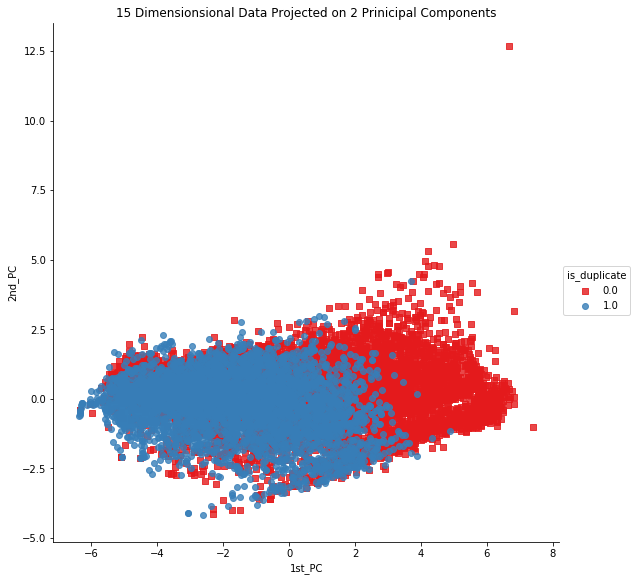

In [70]:
# Plot both 1st_PC and 2nd_PC using Seaborn, where hue is 'is_duplicate':
sns.lmplot(
    data=df_pca_final, x='1st_PC', y='2nd_PC', hue='is_duplicate',
    fit_reg=False, size=8, palette="Set1", markers=['s','o']
)

plt.title('15 Dimensionsional Data Projected on 2 Prinicipal Components')
plt.show()

From the PCA plot, we can see that when we try to visualize our data in 2D, we have overlap of blue and red points, which we can see evidently from the PCA plot above. There's also one outlier point which is a red point at the top right of the plot.

__We will now see the percentage of variance explained at different number of dimensions__

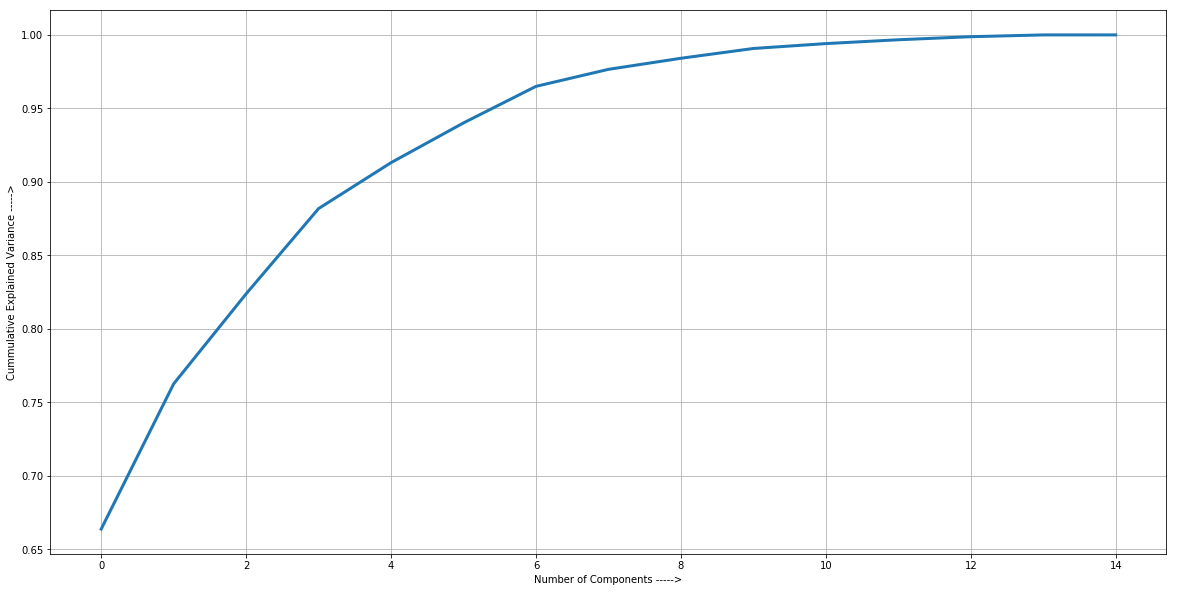

In [72]:
# Generate 15 Dimensional Principal Components:
pca.n_components = 15

# Project the 15 Dimensional data on a 15 Dimensional Hyperplane:
pca_variance = pca.fit_transform(std_data)

# We will generate individual eigen values divided with the eigen sums:
# percentage_variance_explained is named as 'perc_var_exp'
perc_var_exp = pca.explained_variance_ / np.sum(pca.explained_variance_)

# Now we will take a Prefix Sum of the perc_var_exp:
ps_var_explained = np.cumsum(perc_var_exp)

# Plot the prefix summed variances to find the number of dimensions to be taken
# to retain the information/variance at different amounts of percentages:
plt.figure(1, figsize=(20,10))
plt.clf()
plt.plot(ps_var_explained, linewidth=3)
plt.grid()
plt.xlabel('Number of Components ----->')
plt.ylabel('Cummulative Explained Variance ----->')
plt.show()

Analysis: We can see that more than 95% of variance is explained when we reduce the dimensions of the original 15 dimensional data to 6 dimensional data. With 2 Dimensions, we can only explain more than 80% of data. That's the reason, we can see a significant overlap of red & blue points in the PCA plot.

With  reduction to 3 Dimensions, we can explain more than 85% of data. 

#### 3D PCA Plot

In [73]:
# Initiate the PCA instance:
pca_3d = decomposition.PCA()

# Configuring the parameters:
# The number of components = 3, since we are projecting 15D points on a 3D plane.
# We will get the top 3 eigen vectors as the principal components:
pca_3d.n_components = 3

pca_sample_data_3d = pca_3d.fit_transform(std_data)

print("~> Shape of pca_sample_data is:", pca_sample_data_3d.shape)

~> Shape of pca_sample_data is: (10000, 3)


In [74]:
# Attaching the sample_label feature to the attained pca_sample_data_3d to plot
# our data properly:
pca_sample_data_final_3d = np.vstack((pca_sample_data_3d.T, sample_labels)).T
pca_sample_data_final_3d.shape

(10000, 4)

<IPython.core.display.Javascript object>


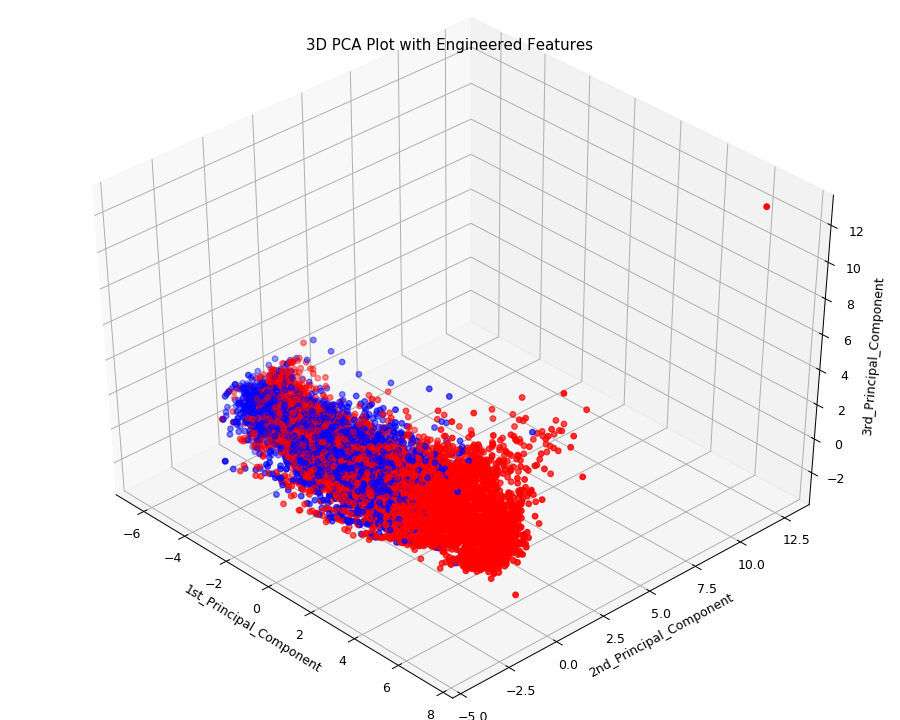

In [100]:
# Necessary library to make a 3D Scatter plot:
%matplotlib notebook
import matplotlib
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

color = ['red', 'blue']
l = [float(i) for i in sample_labels]

ax.scatter(
    pca_sample_data_final_3d[:,0:1], pca_sample_data_final_3d[:,1:2],
    pca_sample_data_final_3d[:,2:3], c = l, 
    cmap = matplotlib.colors.ListedColormap(color)
)
ax.set_title('3D PCA Plot with Engineered Features')
ax.set_xlabel('1st_Principal_Component')
ax.set_ylabel('2nd_Principal_Component')
ax.set_zlabel('3rd_Principal_Component')
plt.show()

Analysis: We can see that there's a lot of overlap even in the 3D PCA plot.
Therefore, now we will go for t-SNE plotting, both 2D and 3D.

<br><br>
#### 3.5.2.2 Visualization using t-Distributed Stochastic Neighbourhood Embedding [t-SNE]

t-SNE algorithm doesn't depend on a standardized data [mean centered], but depends on normalized data, because here, we are trying t-SNE tries to find distance between points to embed them in a lower dimension, and mean centering won't have any affect when finding the distances.

__2D t-SNE Plot__

In [102]:
# Using t-SNE for visualizing 15 Dimensional data in a 2 Dimensional Plane:
# Necessary Library import for Normalizing the data:
from sklearn.preprocessing import MinMaxScaler

# We will use the previously sampled 10k data points, i.e., df_sample
df_sample.head(1)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   

                                           question2  cwc_min   cwc_max  \
0  what is the step by step guide to invest in sh...  0.99998  0.833319   

    csc_min   csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
0  0.999983  0.999983  0.916659  0.785709           0.0            1.0   

   abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  fuzz_ratio  \
0           0.0      13.0              100                93          93   

   fuzz_parital_ratio  longest_substr_ratio  
0                 100              0.982759

In [105]:
# Normalizing the df_sample:
df_sample_normalized = MinMaxScaler().fit_transform(
    df_sample[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 
               'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',
               'abs_len_diff', 'mean_len', 'token_set_ratio','token_sort_ratio',
               'fuzz_ratio', 'fuzz_parital_ratio', 'longest_substr_ratio']]
)
# We have sample_labels as our is_duplicate list when we stored and dropped labels for
# plotting PCA plot.
df_sample_normalized[:2,:]

array([[ 0.99998667,  0.833325  ,  0.99999   ,  0.99999167,  0.91666361,
         0.78571391,  0.        ,  1.        ,  0.        ,  0.09923664,
         1.        ,  0.93      ,  0.93      ,  1.        ,  0.98926696],
       [ 0.79998933,  0.39999867,  0.74998625,  0.599993  ,  0.6999965 ,
         0.46666667,  0.        ,  1.        ,  0.        ,  0.09541985,
         0.86      ,  0.63      ,  0.66      ,  0.75      ,  0.60010188]])

As we can see above, all the points are normalized.

In [107]:
# Necessary Library Imports to apply t-SNE on our data:
from sklearn.manifold import TSNE

tsne_2D_model = TSNE(
    n_components=2, init='random', method='barnes_hut', n_iter=1000,
    verbose=2, angle=0.5
)
st = time.time()
tsne_2D_data = tsne_2D_model.fit_transform(df_sample_normalized)
print('Total time taken to get the tsne 2D data: {} minutes'
     .format(round((time.time()-st)/60, 2)))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.086s...
[t-SNE] Computed neighbors for 10000 samples in 1.387s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.106319
[t-SNE] Computed conditional probabilities in 0.739s
[t-SNE] Iteration 50: error = 95.4943619, gradient norm = 0.0220093 (50 iterations in 21.959s)
[t-SNE] I

In [108]:
tsne_2D_data.shape

(10000, 2)

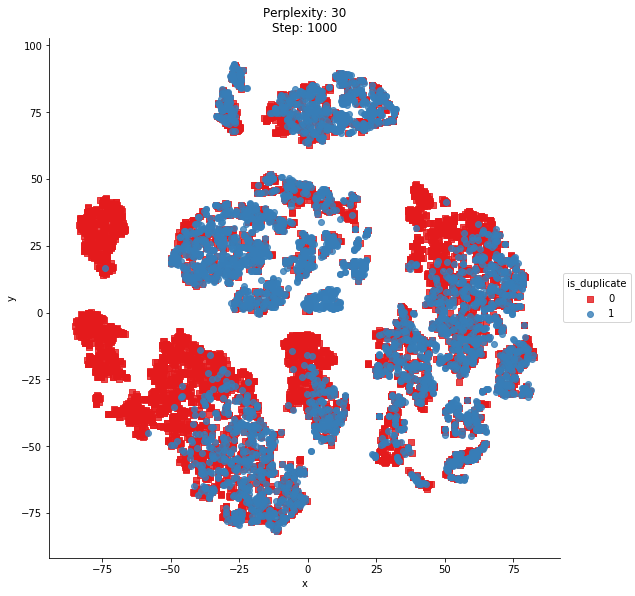

In [110]:
%matplotlib inline
df_tsne_2D = pd.DataFrame(
    {'x':tsne_2D_data[:,0], 'y':tsne_2D_data[:,1], 
     'is_duplicate':sample_labels}
)

# Plot the TSNE plot:
sns.lmplot(
    data=df_tsne_2D, x='x', y='y', hue='is_duplicate', fit_reg=False, size=8,
    palette='Set1', markers=['s','o']
)
plt.title('Perplexity: 30\nStep: 1000')
plt.show()

Analysis: The overlap is still existing. We will try and see if the overlap i resolved by 3D t-SNE Scatter Plot.

__3D t-SNE Plot__

In [111]:
# We will take n_components=3, because we want to reduce the dimensions to 3D.
tsne_3D_model = TSNE(
    n_components=3, init='random', method='barnes_hut', n_iter=1000,
    verbose=2, angle=0.5
)
st = time.time()
tsne_3D_data = tsne_3D_model.fit_transform(df_sample_normalized)
print('Total time taken to get the tsne 3D data: {} minutes'
     .format(round((time.time()-st)/60, 2)))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.048s...
[t-SNE] Computed neighbors for 10000 samples in 1.385s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.106319
[t-SNE] Computed conditional probabilities in 0.606s
[t-SNE] Iteration 50: error = 96.8366852, gradient norm = 0.0102541 (50 iterations in 46.923s)
[t-SNE] I

In [119]:
print(type(tsne_3D_data))
tsne_3D_data.shape

<class 'numpy.ndarray'>


(10000, 3)

In [118]:
# Our labels are in sample_labels numpy array and in list variable 'l'
print(len(l))
sample_labels.shape

10000


(10000,)

<IPython.core.display.Javascript object>


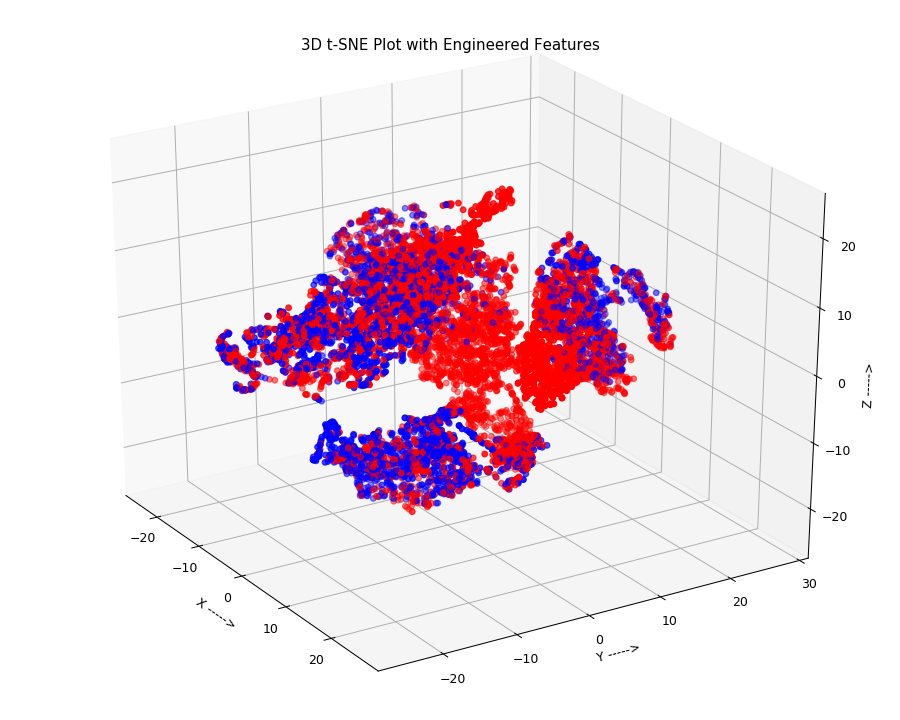

In [121]:
%matplotlib notebook
fig_tsne_3D = plt.figure(figsize=(10,8))
ax_tsne = Axes3D(fig_tsne_3D)

# The following lists 'color' and 'l' are already defined 
# above while plotting for 3D PCA as the following:
# color = ['red', 'blue']
# l = [float(i) for i in sample_labels]

ax_tsne.scatter(
    tsne_3D_data[:,0:1], tsne_3D_data[:,1:2],
    tsne_3D_data[:,2:3], c = l, 
    cmap = matplotlib.colors.ListedColormap(color)
)
ax_tsne.set_title('3D t-SNE Plot with Engineered Features')
ax_tsne.set_xlabel('X ----->')
ax_tsne.set_ylabel('Y ----->')
ax_tsne.set_zlabel('Z ----->')
plt.show()

Analysis: There's a clear overlap of points in all the red (is_duplicate=0) & blue (is_duplicate=1) points. In the middle, we can see that the red points are nicely seggregated in the 3D t-SNE plot. These advanced engineered features are definitely useful. 

The use of the features will be further enhanced when we use tf-idf weighted word2vec to convert 'question1' and 'question2' into numerical word vectors, which retain the similarity depending on the sentiment of the questions.